In [1]:
source("../data_science_helpers/R_helpers.R")

Loading required package: nortest

Loading required package: tidyr

Loading required package: jsonlite



[1] "NOT NORMAL"


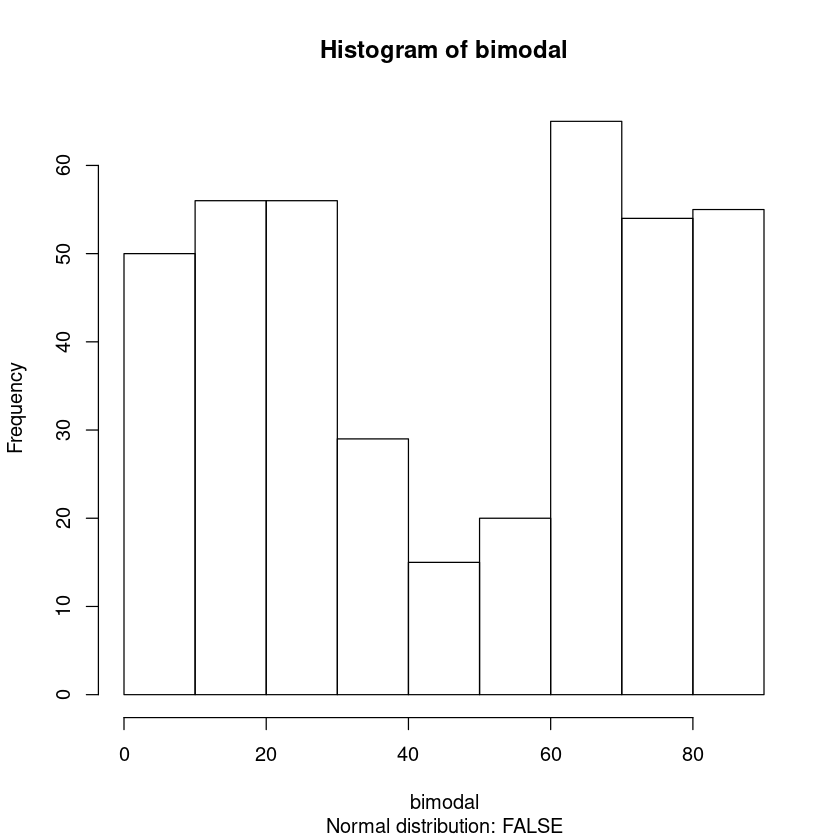

In [2]:
# Let's create a non-normal distribution to demonstrate

bimodal_distribution = c(runif(100,1,30),
    runif(200,1,90),
    runif(100,60,90))
is_normal = is_normal_distribution(bimodal_distribution)
plot_distribution(bimodal_distribution, "bimodal", is_normal)

In [3]:
# Let's take some samples from the population

samples_target = 100
sample_size = 30
sample_statistics = c()

for (i in (1:samples_target)) {
    random_sample = sample(bimodal_distribution, size=sample_size)
    sample_statistic = mean(random_sample) #Also called a point estimate
    sample_statistics = c(sample_statistics, sample_statistic)
}


[1] "TRUE"


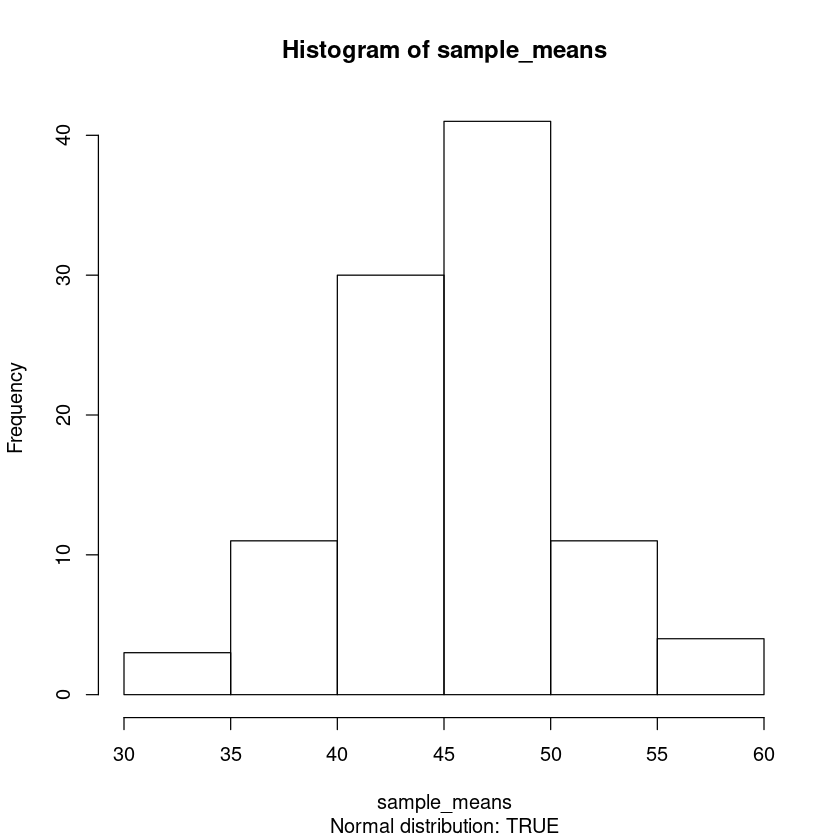

In [4]:
# The statistics from each sample should be approximately normal

is_normal = is_normal_distribution(sample_statistics)
plot_distribution(sample_statistics, "sample_means", is_normal)

This is an implication of the Central Limit Theorem.
If the sample has no sample errors or response errors, then we can use the sample to infer things about the population.
The confidence interval is where we think the population parameter lies, based on a confidence level.

### Finding the CI

Given:

a sample of the population

$ \mu $ : the population parameter we want to know about, which is unknown

$ n $ : the size of the sample

$ \bar{x} $ : the sample statistic

confidence between 0 and 1

$ \alpha $ : 1-confidence


In [5]:
sample = c(1,2,4,5,6,9,12,23,37)
alpha = 0.05
n = length(sample)
sample_statistic = mean(sample)
sample_statistic

[1] 11

### When you know the $ \sigma $ of the population

When you know the population's standard deviation, then first, use $ \frac{\alpha}{2} $ to find Z from the normal distribution.

$ \bar{x} \pm Z \frac{\sigma}{\sqrt{n}} $ 

In [6]:
standard_deviation = NaN # This must be defined, otherwise, use the T distribution
error = standard_deviation/sqrt(n)
Z = qnorm(1-alpha/2)

CI_lower = sample_statistic - Z*error
CI_upper = sample_statistic + Z*error

CI_lower
CI_upper

[1] NaN

[1] NaN

In [7]:
sprintf("We can say with %spc confidence, assuming the sample is random and is a normal distribution, the population parameter is between %s and %s", (1-alpha)*100, CI_lower, CI_upper)

[1] "We can say with 95pc confidence, assuming the sample is random and is a normal distribution, the population parameter is between NaN and NaN"

### When you don't know $ \sigma $, or if the sample is smaller than 120, you should instead use the sample's standard deviation

Use $ \frac{\alpha}{2} $ and the $ df $ to find the T from the student distribution

$ \bar{x} \pm T \frac{S}{\sqrt{n}} $ 

Above a sample size of about 120, the Student (T) and Normal distributions are almost the same

In [8]:
variance = var(sample)
standard_deviation = sqrt(variance) # Is a sample SD by default
error = standard_deviation/sqrt(n)
degrees_of_freedom = n-1
T = qt(1-alpha/2, degrees_of_freedom)

CI_lower = sample_statistic - 1.89457860509001*error
CI_upper = sample_statistic + 1.89457860509001*error

CI_lower
CI_upper

[1] 3.541037

[1] 18.45896

In [9]:
sprintf("We can say with %spc confidence, assuming the sample is random and is a normal distribution, the population parameter is between %s and %s", (1-alpha)*100, CI_lower, CI_upper)

[1] "We can say with 95pc confidence, assuming the sample is random and is a normal distribution, the population parameter is between 3.54103657279347 and 18.4589634272065"